<a href="https://colab.research.google.com/github/MarioROT/CV-MAI/blob/main/Session%208/lab_08_1_Image_Classification_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #4_1 : Image Classification using CNN

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks
*   Using pre-trained networks
*   Feature visualizations

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
#Importing custom scripts

%%shell
git clone https://github.com/mariorot/CV-MAI
mv CV-MAI/scripts/* /content/

Cloning into 'CV-MAI'...
remote: Enumerating objects: 26321, done.
remote: Counting objects: 100% (5248/5248), done.
remote: Compressing objects: 100% (5204/5204), done.
remote: Total 26321 (delta 49), reused 5234 (delta 44), pack-reused 21073
Receiving objects: 100% (26321/26321), 1.25 GiB | 23.95 MiB/s, done.
Resolving deltas: 100% (148/148), done.
Updating files: 100% (26212/26212), done.


In [2]:
#Importing necessary libraries

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color, transform
from tensorflow import keras
import random
import custom_plots as cp

In [3]:
# solution
#Getting the image data set, and splitting into train and test, images and labels.
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
rand_img=[]

unique_classes = np.unique(y_train)
np.random.seed(7)

# Iterate through each unique class
for img_class in unique_classes:
  class_indices = np.where(y_train == img_class)[0]
  rand_indices = np.random.choice(class_indices, size=10, replace=False)
  rand_img.extend(x_train[rand_indices])

# rand_img is now a list containing 10 random samples from each class

NameError: ignored

In [ ]:
#Plotting the 100 images, 10 random sample for each category
plot=cp.custom_grids([],10,10,figsize=(10,10),axis='off',use_grid_spec=False)
plot.show()

for img in rand_img:
  plot.add_plot(axis='off').imshow(img)

In [ ]:
#Converting labels in one-hot encodding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

In [ ]:
# Normalizing the images
x_train=x_train.astype("float32") / 255
# x_train=x_train.reshape(50000,3072)

x_test=x_test.astype("float32") / 255
# x_test=x_test.reshape(10000,3072)

In [ ]:
print(x_train.shape)
print(x_test.shape)

## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Activation, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
# solution
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#First run with GPU and took almost an hour
model1 = model.fit(x_train, y_train, batch_size=32, epochs=512, validation_split=0.1)

Epoch 1/512
1407/1407 [==============================] - 16s 5ms/step - loss: 1.8167 - accuracy: 0.3484 - val_loss: 1.7196 - val_accuracy: 0.3820
Epoch 2/512
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4620 - accuracy: 0.4762 - val_loss: 1.3900 - val_accuracy: 0.5106
Epoch 3/512
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3105 - accuracy: 0.5330 - val_loss: 1.4075 - val_accuracy: 0.4994
Epoch 4/512
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2162 - accuracy: 0.5712 - val_loss: 1.2242 - val_accuracy: 0.5670
Epoch 5/512
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1447 - accuracy: 0.5974 - val_loss: 1.2099 - val_accuracy: 0.5758
Epoch 6/512
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0868 - accuracy: 0.6183 - val_loss: 1.1472 - val_accuracy: 0.6000
Epoch 7/512
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0349 - accuracy: 0.6387 - val_loss: 1.2714 - val_a

In [ ]:
#Since the capacity of usage is limited, it disconnected our session. Then we reduced the epochs to 40 since we did not see much improvement from that epoch
model1 = model.fit(x_train, y_train, batch_size=32, epochs=40, validation_split=0.1)

Epoch 1/40
1407/1407 [==============================] - 44s 31ms/step - loss: 1.7853 - accuracy: 0.3602 - val_loss: 1.6393 - val_accuracy: 0.4168
Epoch 2/40
1407/1407 [==============================] - 40s 28ms/step - loss: 1.4619 - accuracy: 0.4820 - val_loss: 1.4850 - val_accuracy: 0.4646
Epoch 3/40
1407/1407 [==============================] - 41s 29ms/step - loss: 1.3150 - accuracy: 0.5361 - val_loss: 1.3398 - val_accuracy: 0.5336
Epoch 4/40
1407/1407 [==============================] - 39s 28ms/step - loss: 1.2266 - accuracy: 0.5674 - val_loss: 1.2688 - val_accuracy: 0.5506
Epoch 5/40
1407/1407 [==============================] - 41s 29ms/step - loss: 1.1573 - accuracy: 0.5931 - val_loss: 1.2015 - val_accuracy: 0.5798
Epoch 6/40
1407/1407 [==============================] - 40s 28ms/step - loss: 1.1009 - accuracy: 0.6145 - val_loss: 1.1720 - val_accuracy: 0.5912
Epoch 7/40
1407/1407 [==============================] - 40s 28ms/step - loss: 1.0504 - accuracy: 0.6340 - val_loss: 1.1251 -

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 512 epochs with a batch size of 32. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3. Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
# solution
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2_data = model2.fit(x_train, y_train, batch_size=32, epochs=40, validation_split=0.1)

Epoch 1/40
1407/1407 [==============================] - 117s 82ms/step - loss: 1.6917 - accuracy: 0.3943 - val_loss: 1.5724 - val_accuracy: 0.4372
Epoch 2/40
1407/1407 [==============================] - 113s 80ms/step - loss: 1.3321 - accuracy: 0.5280 - val_loss: 1.3064 - val_accuracy: 0.5398
Epoch 3/40
1407/1407 [==============================] - 113s 80ms/step - loss: 1.1875 - accuracy: 0.5825 - val_loss: 1.2394 - val_accuracy: 0.5594
Epoch 4/40
1407/1407 [==============================] - 113s 80ms/step - loss: 1.0785 - accuracy: 0.6224 - val_loss: 1.1311 - val_accuracy: 0.6092
Epoch 5/40
1407/1407 [==============================] - 113s 81ms/step - loss: 0.9859 - accuracy: 0.6574 - val_loss: 1.1929 - val_accuracy: 0.5696
Epoch 6/40
1407/1407 [==============================] - 115s 82ms/step - loss: 0.9016 - accuracy: 0.6888 - val_loss: 1.0566 - val_accuracy: 0.6342
Epoch 7/40
1407/1407 [==============================] - 114s 81ms/step - loss: 0.8266 - accuracy: 0.7139 - val_loss: 1

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [ ]:
# solution
print(model2_data.history.keys())
print(model1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


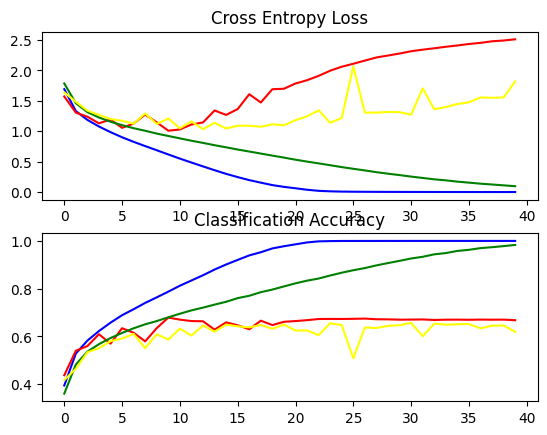

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(model2_data.history['loss'], color='blue', label='train')
plt.plot(model2_data.history['val_loss'], color='red', label='val')
plt.plot(model1.history['loss'], color='green', label='train')
plt.plot(model1.history['val_loss'], color='yellow', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(model2_data.history['accuracy'], color='blue', label='train')
plt.plot(model2_data.history['val_accuracy'], color='red', label='val')
plt.plot(model1.history['accuracy'], color='green', label='train')
plt.plot(model1.history['val_accuracy'], color='yellow', label='val')
plt.show()

**Solution**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# solution
import numpy as np
predictions = model2.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 8s 26ms/step
(10000, 10)


In [ ]:
from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

array([[723,  24,  52,  18,  17,  11,  14,   8,  89,  44],
       [ 35, 772,  15,  14,   8,   4,  13,   4,  39,  96],
       [ 65,   8, 536,  67,  97,  81,  77,  35,  19,  15],
       [ 36,  16,  82, 460,  56, 211,  75,  31,  17,  16],
       [ 28,   5,  86,  59, 618,  47,  49,  82,  20,   6],
       [ 22,   2,  75, 192,  48, 569,  34,  45,   7,   6],
       [  7,  14,  57,  66,  50,  45, 736,   8,  11,   6],
       [ 28,   6,  37,  44,  70,  79,   7, 708,   5,  16],
       [ 69,  44,  15,  12,  12,  15,   8,   3, 784,  38],
       [ 41, 112,   8,  21,  10,  13,  12,  27,  42, 714]])

**Solution**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# solution
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


313/313 [==============================] - 6s 19ms/step - loss: 2.5742 - accuracy: 0.6620
Test loss: 2.5741758346557617
Test accuracy: 0.6620000004768372


## Define the complete VGG architecture.

**Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model3.add(Conv2D(128, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(10, activation='relu'))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                   

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# solution
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model3_data = model3.fit(x_train, y_train, batch_size=32, epochs=40, validation_split=0.1)

Epoch 1/40
1407/1407 [==============================] - 29s 10ms/step - loss: 3.3342 - accuracy: 0.1245 - val_loss: 3.6185 - val_accuracy: 0.1206
Epoch 2/40
1407/1407 [==============================] - 13s 9ms/step - loss: 3.5779 - accuracy: 0.1169 - val_loss: 3.6092 - val_accuracy: 0.1040
Epoch 3/40
1407/1407 [==============================] - 13s 9ms/step - loss: 3.5679 - accuracy: 0.1332 - val_loss: 3.6325 - val_accuracy: 0.1064
Epoch 4/40
1407/1407 [==============================] - 14s 10ms/step - loss: 3.5767 - accuracy: 0.1184 - val_loss: 3.6053 - val_accuracy: 0.1476
Epoch 5/40
1407/1407 [==============================] - 13s 9ms/step - loss: 3.5576 - accuracy: 0.1351 - val_loss: 3.5749 - val_accuracy: 0.1434
Epoch 6/40
1407/1407 [==============================] - 13s 9ms/step - loss: 3.5752 - accuracy: 0.1188 - val_loss: 3.5883 - val_accuracy: 0.1292
Epoch 7/40
1407/1407 [==============================] - 13s 9ms/step - loss: 3.5380 - accuracy: 0.1473 - val_loss: 3.5622 - val_

In [ ]:
pred = model3.predict(x_test)

print(pred.shape)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 2s 4ms/step
(10000, 10)


In [ ]:
from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)

confusion_matrix(gt, pred)

array([[  2,   1,   0,   0,   5,   0, 580,   0, 202, 210],
       [  5,   1,   0,   6,  13,   0, 305,   0, 376, 294],
       [ 11,   1,   0,   8,  24,   4, 714,   0, 129, 109],
       [  8,   2,   0,  31,  51,  11, 643,   0,  94, 160],
       [  3,   1,   0,  14,  69,   1, 665,   0, 124, 123],
       [  8,   3,   0,  28,  37,   6, 697,   0, 116, 105],
       [  8,   3,   0,  11,  25,   3, 700,   0, 151,  99],
       [  9,   1,   0,   5,  40,   2, 452,   0, 160, 331],
       [  2,   0,   0,   4,   7,   0, 281,   0, 323, 383],
       [  1,   0,   0,   1,  12,   0, 197,   0, 202, 587]])

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**

*(Double-click or enter to edit)*

...

# Transfer Learning

It is not always necessary to train models from scratch. We can use the knowledge of networks trained on other tasks to learn the task at hand. In this exercise, we will explore the use of pre-trained weights and train on the CIFAR-10 dataset.

*   Create a base imagenet pretrained InceptionV3 model.
    *    Hint: Use tf.keras.applications to create the model
    *    Pay attention to the include_top parameter.


In [61]:
from keras.backend import clear_session
clear_session()

In [62]:
# solution

V3 = keras.applications.InceptionV3(include_top=False, weights='imagenet',input_shape=(256,256,3))
V3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

*    Add a global average pooling layer, followed by a fully-connected layer with 1024 neurons and then the classification layer.

In [63]:
from tensorflow.keras.layers import GlobalAveragePooling2D, UpSampling2D

model4=Sequential()
model4.add(UpSampling2D((2,2)))              ## UpSampling increase the row and column of the data.Sometimes if we have less data so we can try to increase the data in this way.
model4.add(UpSampling2D((2,2)))
model4.add(UpSampling2D((2,2)))
model4.add(V3)
model4.add(GlobalAveragePooling2D())
model4.add(Dense(1024, activation='relu'))
model4.add(Dense(10, activation='relu'))

In [64]:
model4.summary()

ValueError: ignored

*   Train the model by freezing the base model. Train only the newly added layers.
    *    Hint: Every layer has an attribute called 'trainable'
*   Compile the model and train the model for a few epochs only.

In [65]:
# solution
for layer in V3.layers:
    layer.trainable = False


model4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model4.summary()

ValueError: ignored

In [47]:
model4_data = model4.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10


ValueError: ignored

*    Freeze the bottom layers and unfreeze the base layers.
*    Compile and train the classifier with a very low learning rate (0.0001)

In [ ]:
# solution



*    Compare the performance of the VGG model and the Inception-V3 model.

**Solution**

*(Double-click or enter to edit)*

...

*    When do we train models from scratch? What are the potential issues in training models from scratch?

**Solution**

*(Double-click or enter to edit)*

...

*    Why do we use pre-trained weights?
*    What is the difference between using random initialization and using weights from a pre-trained model?

**Solution**

*(Double-click or enter to edit)*

...

# Extracting features from Deep Networks

It is quite possible to extract features (similar to SIFT or ORB) from different layers of deep network.

*   Load ResNet50 model with imagenet weights and check the summary of the model
*   Create a model to extract features from the 'avg_pool' layer.
*   Extract features from the layer for all the train images.
*   Use the extracted features to train a SVM classifier.
    *    Use GridSearchCV and SVC to perform the classification

In [ ]:
# solution



*    Evaluate the trained SVM model using the test set
*    Calculate the accuracy score and confusion matrix

In [ ]:
# solution



# Feature Visualizations

In order to visualize the features of a higher dimension data, t-SNE is used. t-SNE converts the affinities of the data points to probabilities. It recreates the probability distribution in a low-dimensional space. It is very helpful in visualizing features of different layers in a neural network.

You can find more information about t-SNE [here](https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne)

*    Use TSNE to visualize the features extracted in the previous exercise.
    *    Hint: TSNE function is available in the *sklearn.manifold* package.

In [ ]:
# solution



*    Why is feature visualization helpful?

**Solution**

*(Double-click or enter to edit)*

...